In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import HTML, display
from matplotlib.ticker import AutoMinorLocator

pd.options.display.max_rows = 75
pd.options.display.max_columns = 75

In [10]:
df = pd.read_csv("datasets/test/test_features_sent.csv", low_memory=False)

In [ ]:
df.sample(frac=0.01, random_state=0).to_csv(
    "datasets/small/test/test_features_sent.csv", index=False
)

In [ ]:
pd.read_csv("datasets/small/test/test_features_sent.csv", low_memory=False)

,level_0,energy_consumption_per_annum
0,1002634,222.579687
1,477851,239.771288
2,822040,294.253865
3,1051703,228.940813
4,436651,265.036210
...,...,...
10102,1005707,251.187112
10103,1299466,150.954890
10104,173330,199.726802
10105,698208,131.002469


In [2]:
Y_PRED = "energy_consumption_per_annum"

df = pd.read_csv("datasets/train/train_features_sent.csv", low_memory=False)
df[Y_PRED] = pd.read_csv("datasets/train/train_labels_sent.csv")[Y_PRED]

df_test = pd.read_csv("datasets/test/test_features_sent.csv", low_memory=False)

In [3]:
df.dtypes

level_0                               int64
additional_heat_generators           object
additional_water_heaters             object
altitude                            float64
area_code                             int64
balcony_depth                        object
bearing_wall_material                object
building_category                    object
building_class                       object
building_height_ft                  float64
building_period                      object
building_total_area_sqft            float64
building_type                        object
building_use_type_code                int64
building_use_type_description        object
building_year                       float64
clay_risk_level                      object
consumption_measurement_date         object
has_air_conditioning                   bool
has_balcony                          object
heat_generators                      object
heating_energy_source                object
heating_type                    

In [4]:
print(f"Number of observations (training set): {len(df):,}")
print(f"Number of observations (test set): {len(df_test):,}")
print(f"Total number of observations: {len(df) + len(df_test):,}")
print(
    f"Proportion of observations in the training set: {len(df) / (len(df) + len(df_test)) * 100: .2f}%"
)
print(
    f"Proportion of observations in the test set: {len(df_test) / (len(df) + len(df_test)) * 100: .2f}%"
)
print(f"Number of features (without y): {len(df.columns) - 1}")

Number of observations (training set): 1,010,684
Number of observations (test set): 494,940
Total number of observations: 1,505,624
Proportion of observations in the training set:  67.13%
Proportion of observations in the test set:  32.87%
Number of features (without y): 71


In [5]:
df.head(10)

,level_0,additional_heat_generators,additional_water_heaters,altitude,area_code,balcony_depth,bearing_wall_material,building_category,building_class,building_height_ft,building_period,building_total_area_sqft,building_type,building_use_type_code,building_use_type_description,building_year,clay_risk_level,consumption_measurement_date,has_air_conditioning,has_balcony,heat_generators,heating_energy_source,heating_type,is_crossing_building,living_area_sqft,lowe_floor_thermal_conductivity,lower_floor_adjacency_type,lower_floor_insulation_type,lower_floor_material,main_heat_generators,main_heating_type,main_water_heaters,main_water_heating_type,nb_commercial_units,nb_dwellings,nb_gas_meters_commercial,nb_gas_meters_housing,nb_gas_meters_total,nb_housing_units,nb_meters,nb_parking_spaces,nb_power_meters_commercial,nb_power_meters_housing,nb_power_meters_total,nb_units_total,outer_wall_materials,outer_wall_thermal_conductivity,outer_wall_thickness,percentage_glazed_surfaced,post_code,radon_risk_level,renewable_energy_sources,roof_material,solar_heating,solar_water_heating,thermal_inertia,upper_floor_adjacency_type,upper_floor_insulation_type,upper_floor_material,upper_floor_thermal_conductivity,ventilation_type,wall_insulation_type,water_heaters,water_heating_energy_source,water_heating_type,window_filling_type,window_frame_material,window_glazing_type,window_heat_retention_factor,window_orientation,window_thermal_conductivity,energy_consumption_per_annum
0,111323,[wood stove or insert],NaN,328.08400,881,NaN,CONCRETE,[],[],13.779528,1970-1988,1291.6680,House,1,Residential single-family,1979.0,low,2018-03-14,False,False,"[indeterminate oil boiler,wood stove or insert]",wood + oil,individual,crossing east west,904.1676,2.844251,FULL_EARTH,external,concrete slab,standard oil boiler,[standard oil boiler],standard oil boiler,[low temperature oil boiler],NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,solid concrete block walls,4.364981,20 et -,0.847969,45504141,low,NaN,TILES,False,False,high,EXTERNAL,INTERNAL,Wooden ceiling under metal joists,2.078260,Natural ventilation by duct,internal,[indeterminate oil boiler],oil,individual,argon or krypton,pvc,double glazing,1.116894,"[est,west]",15.347292,290.166345
1,265182,[],NaN,360.89240,260,NaN,NaN,[condo],[2 to 11],43.635172,<1948,7136.4657,Flat,2,Residential multi-family,NaN,medium,2020-02-21,False,False,[indefinite gas boiler],gas,individual,through all way,785.7647,4.498072,LNC,uninsulated,concrete slab,standard gas boiler,"[standard gas boiler,standard gas boiler,Joule...",standard gas boiler,"[lpg/butane/propane condensing boiler,joule-ef...",0.0,24,NaN,NaN,NaN,339.0,5.0,450.0,NaN,NaN,NaN,1122.0,double solid brick walls with air gap,3.364592,20 et -,0.750366,40083759,high,NaN,NaN,False,False,very high,EXTERNAL,EXTERNAL,concrete slab,2.078260,Ventilation by opening windows,internal,[indeterminate gas boiler],gas,individual,argon or krypton,wood,double glazing,1.133072,"[est,west,sud]",17.512631,169.818197
2,927507,[],NaN,324.80316,573,NaN,WOOD - OTHER,[],[],19.685040,2000-2005,4197.9210,House,2,Residential multi-family,1810.0,low,2016-06-14,False,False,[standard gas boiler],gas,individual,crossing east west,1162.5012,2.813221,SANITARY_VACTILE,internal,concrete slab,standard gas boiler,[standard gas boiler],standard gas boiler,[joule-effect electric water heater],NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hollow concrete block walls,2.447516,20 et -,NaN,43247010,low,NaN,TILES,False,False,low,LNC,INTERNAL,plasterboard ceiling,1.790967,Self-regulating mechanical ventilation after 1982,internal,[standard gas boiler],gas,individual,dry air,pvc,double glazing,1.084204,"[est,west]",16.779108,144.499711
3,874620,[],NaN,288.71392,204,NaN,BRICKS,[],[],13.779528,<1948,1646.8767,House,1,Residential single-family,1972.0,medium,2016-10-24,False,True,[nfc electric radiant panels],electricity,individual,through all way,1937.5020,2.749757,FULL_EARTH,external,concrete slab,joule effect generators,[Joule ef

# 1. Describe

In [6]:
display(df.describe())
print(df.describe().shape)

,level_0,altitude,area_code,building_height_ft,building_total_area_sqft,building_use_type_code,building_year,living_area_sqft,lowe_floor_thermal_conductivity,nb_commercial_units,nb_dwellings,nb_gas_meters_commercial,nb_gas_meters_housing,nb_gas_meters_total,nb_housing_units,nb_meters,nb_parking_spaces,nb_power_meters_commercial,nb_power_meters_housing,nb_power_meters_total,nb_units_total,outer_wall_thermal_conductivity,percentage_glazed_surfaced,post_code,upper_floor_thermal_conductivity,window_heat_retention_factor,window_thermal_conductivity,energy_consumption_per_annum
count,1.010684e+06,992545.000000,1.010684e+06,994468.000000,949721.000000,1.010684e+06,951235.000000,1.010672e+06,933373.000000,116104.000000,1.010684e+06,34476.000000,34476.000000,34476.000000,116104.000000,623758.000000,116104.000000,95221.000000,95221.000000,95221.000000,116104.000000,1.003326e+06,882511.000000,1.010684e+06,964886.000000,988325.000000,1.005579e+06,1.010684e+06
mean,7.540240e+05,453.935478,5.175532e+02,20.006577,1642.593517,1.227803e+00,1973.982554,1.227738e+03,3.308581,16.903409,4.914479e+00,0.022530,21.166293,20.852870,46.757303,1.469660,34.852359,0.083716,26.063373,25.516544,104.102666,4.687868e+00,0.827719,5.102518e+07,2.237627,1.247048,1.714496e+01,2.457073e+02
std,4.356355e+05,513.079778,2.387919e+02,12.960314,1963.887500,5.607223e-01,38.921732,2.496711e+03,0.720945,91.571939,2.000624e+01,0.166953,32.800506,32.523487,137.922176,4.575182,109.992888,0.465804,44.429343,44.207655,317.412876,3.063425e+00,0.176220,2.427389e+07,0.852095,0.569495,5.779591e+00,8.054060e+02
min,0.000000e+00,-9.842520,1.090000e+02,0.000000,64.583400,1.000000e+00,1200.000000,0.000000e+00,2.282947,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.088024e+00,0.310000,1.000122e+07,1.488072,0.243582,2.780761e+00,-2.040219e+03
25%,3.768322e+05,124.671920,3.040000e+02,12.795276,882.639800,1.000000e+00,1964.000000,7.965286e+02,2.797533,0.000000,1.000000e+00,0.000000,4.950000,4.800000,6.000000,1.000000,0.000000,0.000000,6.760000,6.450000,12.000000,2.447516e+00,0.720170,3.034212e+07,1.770545,1.084204,1.396372e+01,1.647793e+02
50%,7.536310e+05,295.275600,5.200000e+02,17.060368,1205.556800,1.000000e+00,1979.000000,1.022571e+03,2.844251,0.000000,1.000000e+00,0.000000,13.000000,12.480000,16.000000,1.000000,7.370000,0.000000,15.000000,15.000000,32.000000,2.944443e+00,0.786523,5.049011e+07,1.890570,1.133072,1.605727e+01,2.237132e+02
75%,1.131399e+06,597.112880,7.040000e+02,22.637796,1646.876700,1.000000e+00,1999.000000,1.334724e+03,4.070746,8.000000,1.000000e+00,0.000000,24.000000,24.000000,40.000000,1.000000,28.210000,0.000000,30.000000,29.000000,87.000000,5.515635e+00,0.886707,7.200292e+07,2.201487,1.212343,1.901402e+01,3.007878e+02
max,1.508482e+06,6167.979200,9.520000e+02,511.811040,230444.335100,5.000000e+00,2019.000000,3.815157e+05,5.960612,10874.000000,4.994000e+03,12.000000,834.000000,834.000000,14050.000000,889.000000,9026.180000,35.000000,4463.000000,4490.230000,42317.350000,2.652868e+01,1.998632,9.992662e+07,5.547723,15.891206,2.122490e+02,2.594328e+05


(8, 28)


In [7]:
display(df.describe(include=[object, bool]))
print(df.describe(include=[object, bool]).shape)

,additional_heat_generators,additional_water_heaters,balcony_depth,bearing_wall_material,building_category,building_class,building_period,building_type,building_use_type_description,clay_risk_level,consumption_measurement_date,has_air_conditioning,has_balcony,heat_generators,heating_energy_source,heating_type,is_crossing_building,lower_floor_adjacency_type,lower_floor_insulation_type,lower_floor_material,main_heat_generators,main_heating_type,main_water_heaters,main_water_heating_type,outer_wall_materials,outer_wall_thickness,radon_risk_level,renewable_energy_sources,roof_material,solar_heating,solar_water_heating,thermal_inertia,upper_floor_adjacency_type,upper_floor_insulation_type,upper_floor_material,ventilation_type,wall_insulation_type,water_heaters,water_heating_energy_source,water_heating_type,window_filling_type,window_frame_material,window_glazing_type,window_orientation
count,1010684,209994,105791,956635,1010684,1010684,1010684,1010684,1010684,806450,1010684,1010684,1010328,1010684,1010683,1010684,959213,938214,949694,938765,1010684,1010684,1010606,1010684,977656,929398,997441,9501,956406,1010684,1010684,1010684,966568,921875,979135,1010684,1000342,1010684,1010505,956608,797458,1010280,1005549,1010684
unique,30,22,4,28,704,1820,8,5,3,3,2528,2,2,1491,60,2,9,6,5,12,29,33591,23,36346,20,39,3,10,16,2,2,4,4,6,16,15,9,174,27,2,2,10,5,96
top,[],electric water heating,1 <= … < 2,AGGLOMERATE,[individual house],[individual],1970-1988,House,Residential single-family,medium,2020-02-13,False,False,[gas condensing boiler],electricity,individual,through all way,LNC,uninsulated,concrete slab,joule effect generators,[Joule effect generators],electric water heater with Joule effect,[lpg/butane/propane condensing boiler],hollow concrete block walls,20 et -,low,solar thermal (ecs),TILES,False,False,high,LNC,INTERNAL,Wooden ceiling under wooden joists,Self-regulating mechanical ventilation after 1982,internal,[electric storage tank],electricity,individual,dry air,pvc,double glazing,"[est,north,west,sud]"
freq,737513,105204,42572,233335,487646,471516,341448,810669,815442,377408,995,944532,898889,93840,359981,1004436,505685,347119,390769,680362,372639,250762,434891,306673,449056,442034,683172,4658,649994,1008402,814264,473206,626402,719668,235848,336086,745248,431119,543657,885430,580250,514888,890065,213582


(4, 44)


# 2. Missing values

In [8]:
pd.DataFrame(
    {"Missing values": df.isnull().sum(), "Missing ratio": df.isnull().sum() / len(df)}
).style.format(
    {
        "Missing ratio": "{:.2%}".format,
    }
)

,Missing values,Missing ratio
level_0,0,0.00%
additional_heat_generators,0,0.00%
additional_water_heaters,800690,79.22%
altitude,18139,1.79%
area_code,0,0.00%
balcony_depth,904893,89.53%
bearing_wall_material,54049,5.35%
building_category,0,0.00%
building_class,0,0.00%
building_height_ft,16216,1.60%


# 3. Features

Number of distinct values: 1010684


Number of distinct values: 30


,additional_heat_generators,ratio
[],737513,72.97%
[wood stove or insert],161539,15.98%
[Joule effect generators],68834,6.81%
[standard gas boiler],12316,1.22%
[electric boiler],10302,1.02%
[gas condensing boiler],5846,0.58%
[standard oil boiler],5228,0.52%
[low temperature gas boiler],3202,0.32%
[LPG/butane/propane standard boiler],2240,0.22%
[low temperature oil boiler],959,0.09%


Number of distinct values: 22


,additional_water_heaters,ratio
electric water heating,105204,50.10%
chaudiere gaz standard,42738,20.35%
gas condensing boiler,23896,11.38%
thermodynamic electric hot water (heat pump or tank),17727,8.44%
low temperature gas boiler,11706,5.57%
standard oil boiler,2902,1.38%
independent gas water heater,2677,1.27%
solar water heater,1313,0.63%
heat network,426,0.20%
low temperature oil boiler,331,0.16%


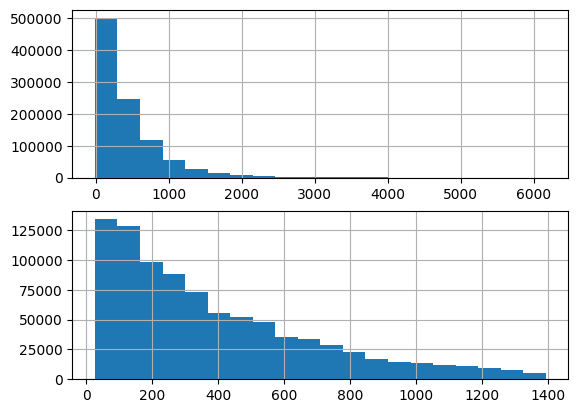

Number of distinct values: 93


,area_code,ratio
858,39332,3.89%
304,33140,3.28%
345,30551,3.02%
660,30154,2.98%
264,27442,2.72%
204,25289,2.50%
354,23591,2.33%
471,23433,2.32%
398,23278,2.30%
664,22015,2.18%


Number of distinct values: 4


,balcony_depth,ratio
1 <= … < 2,42572,40.24%
2 <= … < 3,24270,22.94%
3 <=,20444,19.32%
< 1 m,18505,17.49%


Number of distinct values: 28


,bearing_wall_material,ratio
AGGLOMERATE,233335,24.39%
BRICKS,171853,17.96%
CONCRETE,101031,10.56%
INDETERMINED,59317,6.20%
STONE,57895,6.05%
GRITSTONE,51250,5.36%
AGGLOMERATE - CONCRETE,41653,4.35%
CONCRETE - BRICKS,40681,4.25%
OTHER,39926,4.17%
CHIPBOARD - BRICK,27322,2.86%


Number of distinct values: 704


,building_category,ratio
[individual house],487646,48.25%
[],386926,38.28%
[condo],106238,10.51%
"[condo,individual house]",6495,0.64%
"[individual house,individual house]",4293,0.42%
"[condo,condo]",3852,0.38%
"[individual house,condo]",3808,0.38%
"[individual house,individual house,individual house,individual house,individual house,individual house,individual house,individual house,individual house,individual house]",1699,0.17%
"[condo,condo,condo]",1441,0.14%
"[individual house,individual house,individual house]",1065,0.11%


Number of distinct values: 1820


,building_class,ratio
[individual],471516,46.65%
[],386926,38.28%
[2 to 11],75749,7.49%
[12+],40083,3.97%
"[2 to 11,individual]",4881,0.48%
"[individual,individual]",3650,0.36%
"[individual,2 to 11]",3354,0.33%
"[12+,2 to 11]",2877,0.28%
"[2 to 11,12+]",2652,0.26%
"[12+,individual]",1836,0.18%


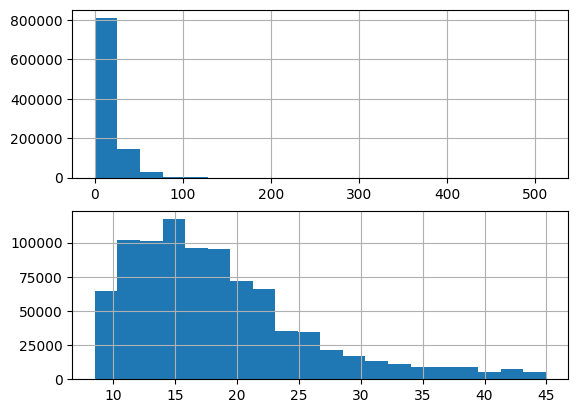

Number of distinct values: 8


,building_period,ratio
1970-1988,341448,33.78%
<1948,168744,16.70%
1949-1970,132250,13.09%
2006-2012,129987,12.86%
1989-1999,113214,11.20%
2000-2005,105200,10.41%
>2012,19761,1.96%
bad sup,80,0.01%


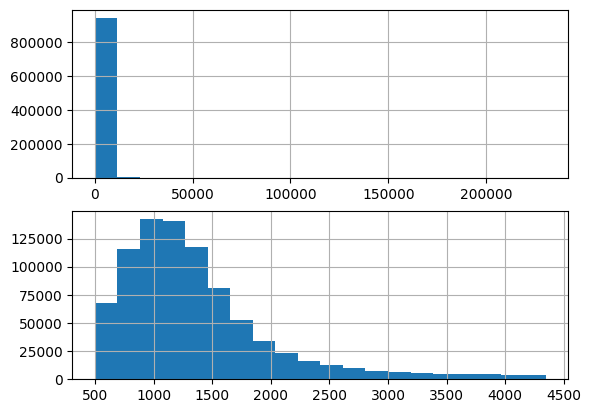

Number of distinct values: 5


,building_type,ratio
House,810669,80.21%
Flat,188503,18.65%
Multiple dwellings,11361,1.12%
Non-residential,145,0.01%
Shopping centres,6,0.00%


Number of distinct values: 3


,building_use_type_code,ratio
1,815442,80.68%
2,183577,18.16%
5,11665,1.15%


Number of distinct values: 3


,building_use_type_description,ratio
Residential single-family,815442,80.68%
Residential multi-family,183577,18.16%
Commercial & Other,11665,1.15%


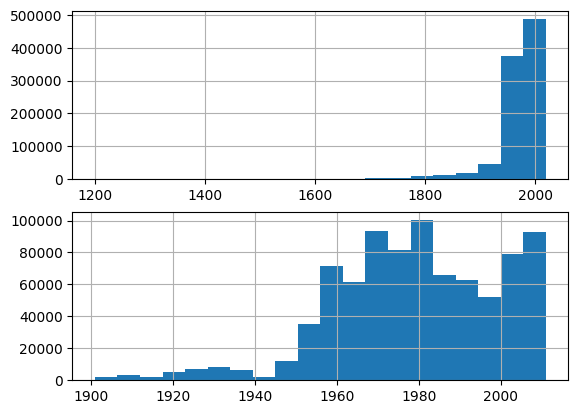

Number of distinct values: 3


,clay_risk_level,ratio
medium,377408,46.80%
low,276259,34.26%
high,152783,18.95%


Number of distinct values: 2528


,consumption_measurement_date,ratio
2020-02-13,995,0.10%
2020-03-04,990,0.10%
2020-02-12,980,0.10%
2019-07-18,973,0.10%
2019-05-16,963,0.10%
2020-02-10,963,0.10%
2019-11-14,955,0.09%
2020-02-05,951,0.09%
2018-10-24,950,0.09%
2020-01-30,937,0.09%


,has_air_conditioning,ratio
False,944532,93.45%
True,66152,6.55%


Number of distinct values: 2


,has_balcony,ratio
False,898889,88.97%
True,111439,11.03%


Number of distinct values: 1491


,heat_generators,ratio
[gas condensing boiler],93840,9.28%
[standard gas boiler],92380,9.14%
[indefinite gas boiler],91669,9.07%
[nfc electric radiant panels],78958,7.81%
[electric convectors nfc],78199,7.74%
[electric radiators],64384,6.37%
[low temperature gas boiler],49061,4.85%
[indeterminate oil boiler],35560,3.52%
"[electric radiators,wood stove or insert]",32134,3.18%
"[nfc electric radiant panels,wood stove or insert]",27785,2.75%


Number of distinct values: 60


,heating_energy_source,ratio
electricity,359981,35.62%
gas,326547,32.31%
wood + electricity,128035,12.67%
fuel oil,76450,7.56%
wood + gas,40909,4.05%
wood + oil,20187,2.00%
electricity + gas,18075,1.79%
wood,13428,1.33%
electricity + oil,6979,0.69%
heat network,5375,0.53%


Number of distinct values: 2


,heating_type,ratio
individual,1004436,99.38%
collective,6248,0.62%


Number of distinct values: 9


,is_crossing_building,ratio
through all way,505685,52.72%
crossing north south,173620,18.10%
not through,143754,14.99%
crossing east west,119851,12.49%
through 90°,14606,1.52%
90° crossing (weak),840,0.09%
all through crossing (weak),484,0.05%
east-west crossing (weak),220,0.02%
north-south crossing (weak),153,0.02%


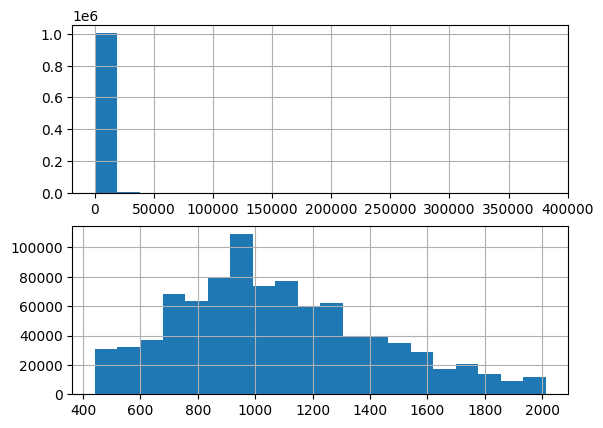

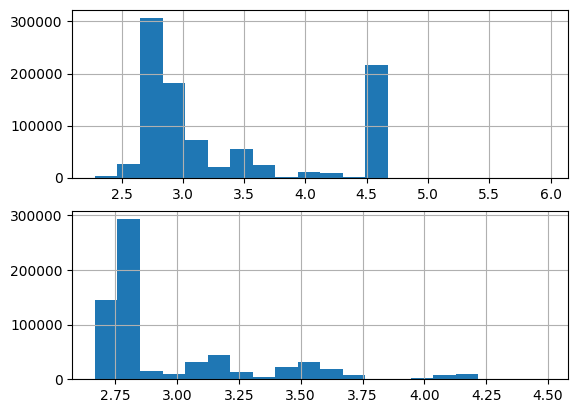

Number of distinct values: 6


,lower_floor_adjacency_type,ratio
LNC,347119,37.00%
FULL_EARTH,341115,36.36%
SANITARY_VACTILE,161007,17.16%
OUTSIDE,76604,8.16%
ADJACENT BUILDING,9042,0.96%
BURIED_WALL,3327,0.35%


Number of distinct values: 5


,lower_floor_insulation_type,ratio
uninsulated,390769,41.15%
external,303271,31.93%
internal,243169,25.60%
external+internal,7799,0.82%
insulated,4686,0.49%


Number of distinct values: 12


,lower_floor_material,ratio
concrete slab,680362,72.47%
"heavy floor, such as clay floor joists, concrete beams",143804,15.32%
Insulated joist floor,44008,4.69%
floor with or without infill,16971,1.81%
wooden floor on wooden joists,14531,1.55%
floor between wooden joists with or without infill,14166,1.51%
brick or rubble wall joists,13451,1.43%
non-differing party floor,5419,0.58%
floor between metal joists with or without infill,3112,0.33%
joist on metal joists,1359,0.14%


Number of distinct values: 29


,main_heat_generators,ratio
joule effect generators,372639,36.87%
standard gas boiler,209420,20.72%
gas condensing boiler,109003,10.79%
standard oil boiler,77345,7.65%
air/air heat pump,74159,7.34%
low temperature gas boiler,55935,5.53%
air/water heat pump,25618,2.53%
electric boiler,20766,2.05%
wood boiler,18938,1.87%
low temperature oil boiler,14873,1.47%


Number of distinct values: 33591


,main_heating_type,ratio
[Joule effect generators],250762,24.81%
[standard gas boiler],153479,15.19%
[gas condensing boiler],79095,7.83%
[standard oil boiler],66845,6.61%
[air/air heat pump],53031,5.25%
[low temperature gas boiler],39982,3.96%
"[Joule effect generators,Joule effect generators]",37313,3.69%
[air-to-water heat pump],20890,2.07%
[wood boiler],16883,1.67%
[electric boiler],15660,1.55%


Number of distinct values: 23


,main_water_heaters,ratio
electric water heater with Joule effect,434891,43.03%
solar water heater,185107,18.32%
standard gas boiler,145988,14.45%
gas condensing boiler,81097,8.02%
standard oil boiler,46596,4.61%
low temperature gas boiler,41398,4.10%
thermodynamic electric hot water (heat pump or tank),33662,3.33%
wood boiler,13599,1.35%
low temperature oil boiler,10757,1.06%
independent gas water heater,5007,0.50%


Number of distinct values: 36346


,main_water_heating_type,ratio
[lpg/butane/propane condensing boiler],306673,30.34%
[solar hot water],140701,13.92%
[joule-effect electric water heater],101748,10.07%
[standard LPG/butane/propane boiler],57972,5.74%
"[lpg/butane/propane condensing boiler,lpg/butane/propane condensing boiler]",42609,4.22%
[low temperature oil boiler],40186,3.98%
[low temperature gas boiler],28588,2.83%
[thermodynamic electric hot water (heat pump or storage tank)],24719,2.45%
"[lpg/butane/propane condensing boiler,lpg/butane/propane condensing boiler,lpg/butane/propane condensing boiler]",12345,1.22%
[other indeterminate DHW],12080,1.20%


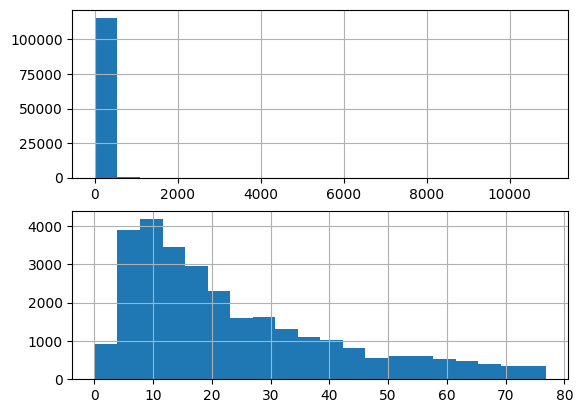

Number of distinct values: 596


,nb_dwellings,ratio
1,769101,76.10%
2,54057,5.35%
3,23873,2.36%
4,19124,1.89%
6,12774,1.26%
5,11153,1.10%
8,9169,0.91%
7,7022,0.69%
12,6779,0.67%
10,6231,0.62%


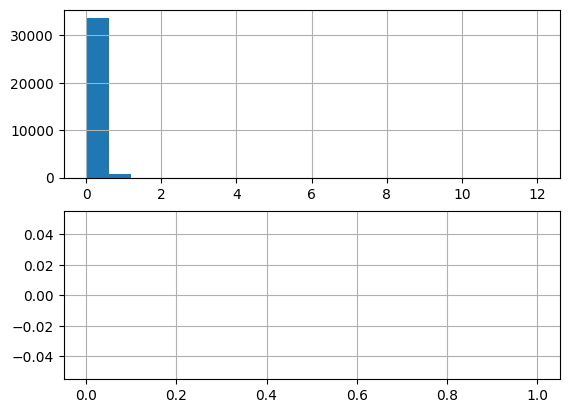

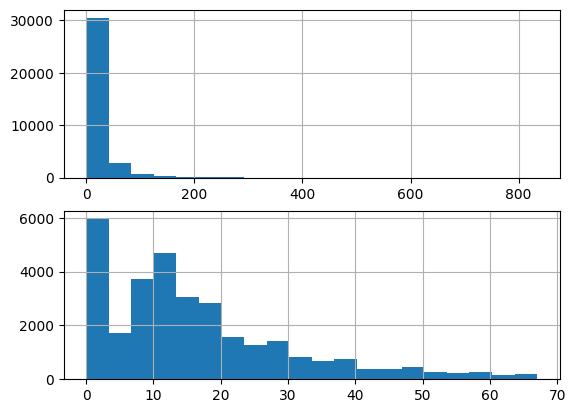

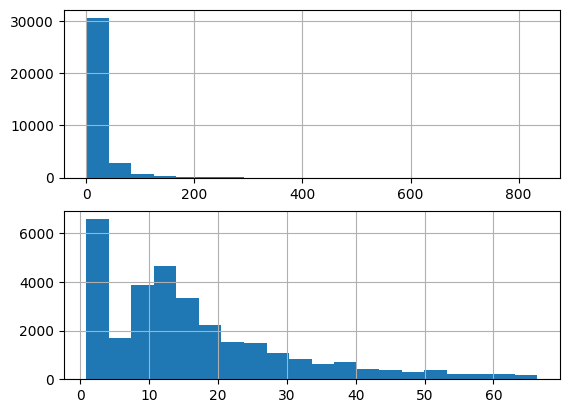

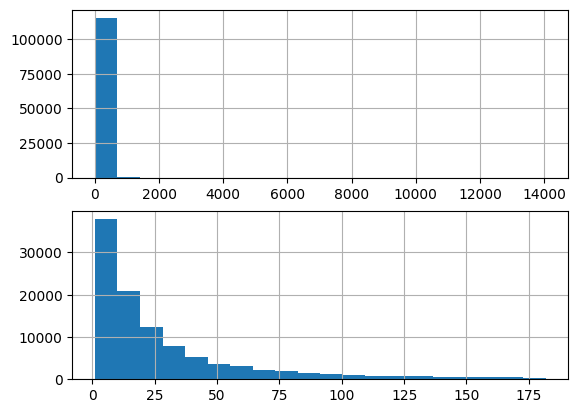

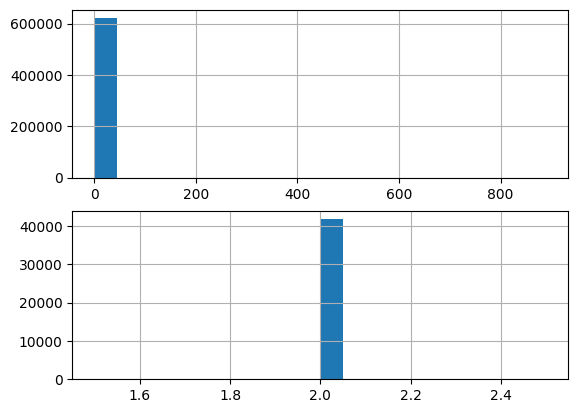

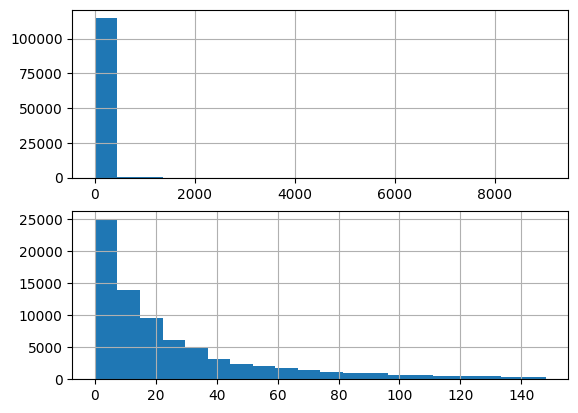

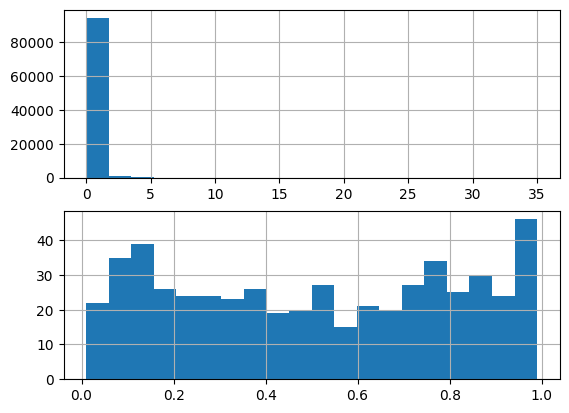

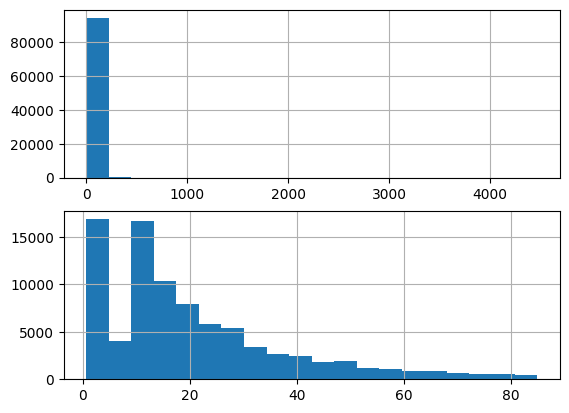

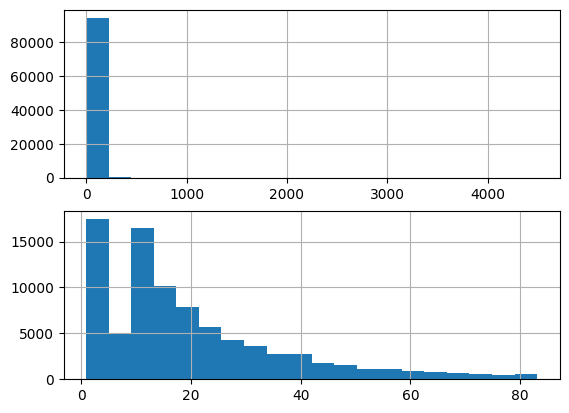

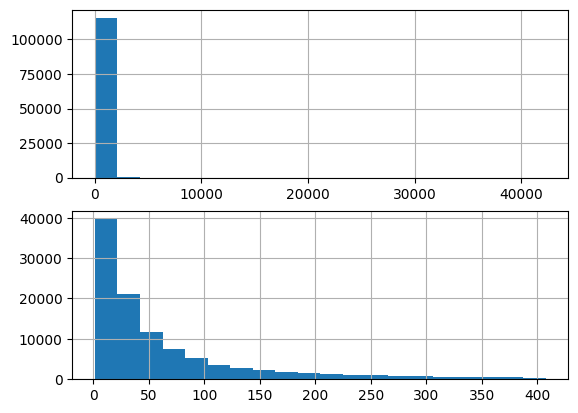

Number of distinct values: 20


,outer_wall_materials,ratio
hollow concrete block walls,449056,45.93%
hollow brick walls,160820,16.45%
concrete block walls,96658,9.89%
double solid brick walls with air gap,63925,6.54%
simple solid brick walls,42914,4.39%
ashlar and rubble stone walls made of a single material,39445,4.03%
solid concrete block walls,39140,4.00%
ashlar and rubble stone walls with an all-material infill,34716,3.55%
wood pan walls without infill,15948,1.63%
monomur terracotta,8906,0.91%


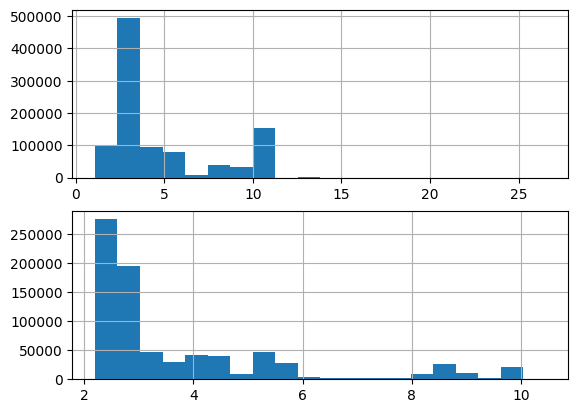

Number of distinct values: 39


,outer_wall_thickness,ratio
20 et -,442034,47.56%
25,81259,8.74%
23,76879,8.27%
20,70254,7.56%
30,44121,4.75%
50,35117,3.78%
28,31990,3.44%
35,24026,2.59%
15 et -,16968,1.83%
33,13560,1.46%


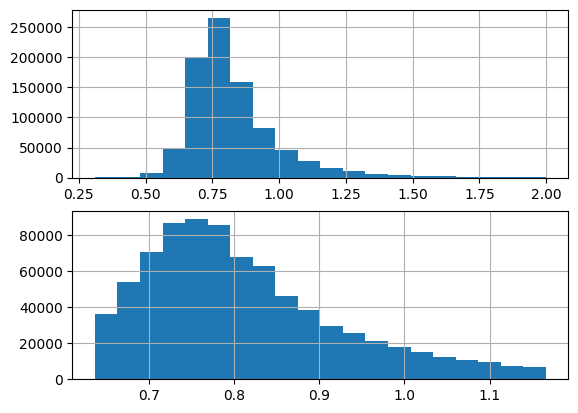

Number of distinct values: 25819


,post_code,ratio
61361663,7603,0.75%
18500402,4559,0.45%
30342119,3453,0.34%
36874744,3252,0.32%
86006092,3198,0.32%
76771557,3177,0.31%
15783770,2946,0.29%
43087731,2944,0.29%
87450065,2685,0.27%
13767773,2519,0.25%


Number of distinct values: 3


,radon_risk_level,ratio
low,683172,68.49%
high,209210,20.97%
medium,105059,10.53%


Number of distinct values: 10


,renewable_energy_sources,ratio
solar thermal (ecs),4658,49.03%
solar photovoltaic,3674,38.67%
solar photovoltaic + solar thermal (ecs),443,4.66%
solar thermal (heating) + solar thermal (hot water),304,3.20%
solar thermal (heating),215,2.26%
solar thermal (heating) + solar thermal (hot water) + solar thermal (hot water+heating),101,1.06%
solar photovoltaic + solar thermal (heating),56,0.59%
solar photovoltaic + solar thermal (heating) + solar thermal (hot water),39,0.41%
solar thermal (DHW) + solar thermal (DHW+heating),6,0.06%
Solar photovoltaic + solar thermal (heating) + solar thermal (hot water) + solar thermal (hot water + heating),5,0.05%


Number of distinct values: 16


,roof_material,ratio
TILES,649994,67.96%
SLATE,124117,12.98%
INDETERMINATE,59267,6.20%
OTHERS,46703,4.88%
CONCRETE,25925,2.71%
TILES - ZINC ALUMINUM,15071,1.58%
ZINC ALUMINUM,11633,1.22%
TILES - OTHERS,6794,0.71%
CONCRETE - TILES,6252,0.65%
SLATES - ZINC ALUMINUM,2780,0.29%


,solar_heating,ratio
False,1008402,99.77%
True,2282,0.23%


,solar_water_heating,ratio
False,814264,80.57%
True,196420,19.43%


Number of distinct values: 4


,thermal_inertia,ratio
high,473206,46.82%
medium,215235,21.30%
low,181779,17.99%
very high,140464,13.90%


Number of distinct values: 4


,upper_floor_adjacency_type,ratio
LNC,626402,64.81%
EXTERNAL,333063,34.46%
ADJACENT_BUILDING,7049,0.73%
INNER_WALL,54,0.01%


Number of distinct values: 6


,upper_floor_insulation_type,ratio
INTERNAL,719668,78.07%
UNINSULATED,133292,14.46%
EXTERNAL,48192,5.23%
INSULATED,19396,2.10%
INTERNAL+EXTERNAL,1326,0.14%
INTERNAL+REFLEXION,1,0.00%


Number of distinct values: 16


,upper_floor_material,ratio
Wooden ceiling under wooden joists,235848,24.09%
attic space under slope,191107,19.52%
concrete slab,164904,16.84%
plasterboard ceiling,116185,11.87%
ceiling between wooden joists with or without infill,108293,11.06%
ceiling with or without infill,48057,4.91%
Wooden ceiling with or without infill under loft,45418,4.64%
heavy ceiling of the clay floor joist or concrete beam type,27718,2.83%
Wooden ceiling over wooden joists,24163,2.47%
Wooden ceiling under metal joists,5945,0.61%


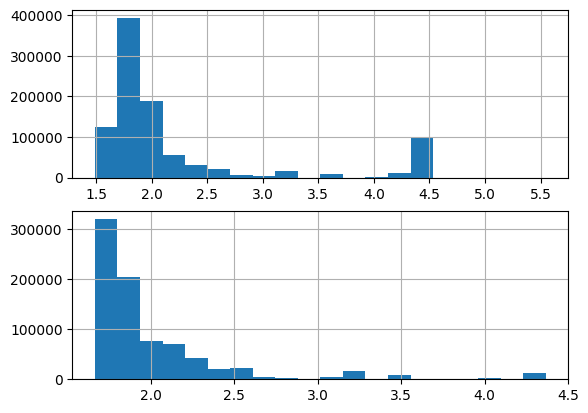

Number of distinct values: 15


,ventilation_type,ratio
Self-regulating mechanical ventilation after 1982,336086,33.25%
Ventilation by opening windows,179242,17.73%
Ventilation system with high and low air inlets,120587,11.93%
Humidity sensitive mechanical exhaust ventilation,100455,9.94%
Humidity sensitive mechanical exhaust ventilation and air inlets,99733,9.87%
Natural ventilation by duct,95459,9.44%
Self-regulating mechanical ventilation before 1982,39762,3.93%
Mechanical extractor on unmodified existing natural ventilation duct,14122,1.40%
Hybrid ventilation with humidity sensitive air inlets,8663,0.86%
Double flow mechanical ventilation with exchanger,6353,0.63%


Number of distinct values: 9


,wall_insulation_type,ratio
internal,745248,74.50%
non insulated,195249,19.52%
external,25690,2.57%
reflection,15168,1.52%
internal+external,9117,0.91%
internal+reflexion,6638,0.66%
MOB,2239,0.22%
external+reflection,718,0.07%
insulated,275,0.03%


Number of distinct values: 174


,water_heaters,ratio
[electric storage tank],431119,42.66%
"[solar water heater,electric storage tank]",105203,10.41%
[indeterminate gas boiler],95762,9.47%
[gas condensing boiler],76820,7.60%
[standard gas boiler],46023,4.55%
[low temperature gas boiler],39609,3.92%
"[solar water heater,standard gas boiler]",36221,3.58%
[thermodynamic electric hot water (pac or tank)],33578,3.32%
[indeterminate oil boiler],28637,2.83%
"[solar water heater,gas condensing boiler]",21044,2.08%


Number of distinct values: 27


,water_heating_energy_source,ratio
electricity,543657,53.80%
gas,333941,33.05%
oil,62729,6.21%
thermodynamic electric hot water (heat pump or tank),40206,3.98%
wood + gas,10537,1.04%
thermodynamic electric hot water (pac or tank) + gas,9330,0.92%
heat network,2671,0.26%
wood,1872,0.19%
thermodynamic electric hot water (heat pump or tank) + oil,1708,0.17%
lpg/butane/propane,1468,0.15%


Number of distinct values: 2


,water_heating_type,ratio
individual,885430,92.56%
collective,71178,7.44%


Number of distinct values: 2


,window_filling_type,ratio
dry air,580250,72.76%
argon or krypton,217208,27.24%


Number of distinct values: 10


,window_frame_material,ratio
pvc,514888,50.96%
wood,340958,33.75%
metal with thermal break,89938,8.90%
metal without thermal break,53750,5.32%
metal,9923,0.98%
polycarbonate,548,0.05%
glass block,154,0.02%
wood or pvc,96,0.01%
other,24,0.00%
parois en polycarbonnate,1,0.00%


Number of distinct values: 5


,window_glazing_type,ratio
double glazing,890065,88.52%
single glazing,109942,10.93%
triple glazing,5064,0.50%
glass block or polycarbonate,260,0.03%
overglazing,218,0.02%


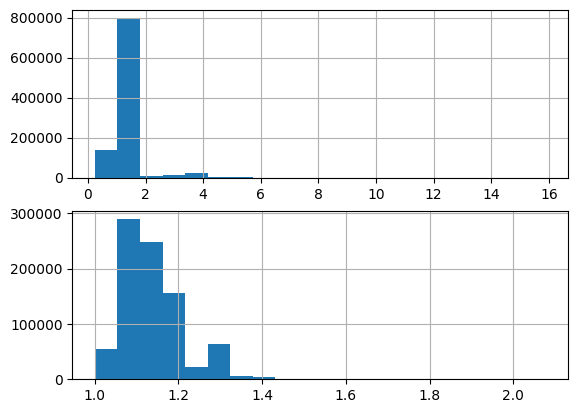

Number of distinct values: 96


,window_orientation,ratio
"[est,north,west,sud]",213582,21.13%
"[north,sud]",201397,19.93%
"[est,west]",118618,11.74%
"[est,west,sud]",85991,8.51%
"[north,west,sud]",72635,7.19%
"[est,north,sud]",72436,7.17%
[],51471,5.09%
"[est,north,west]",44626,4.42%
[sud],21252,2.10%
[north],16214,1.60%


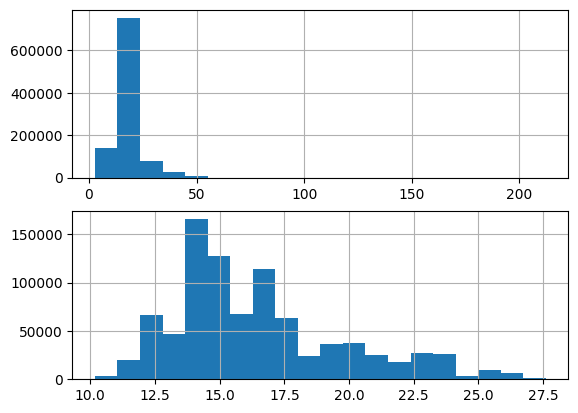

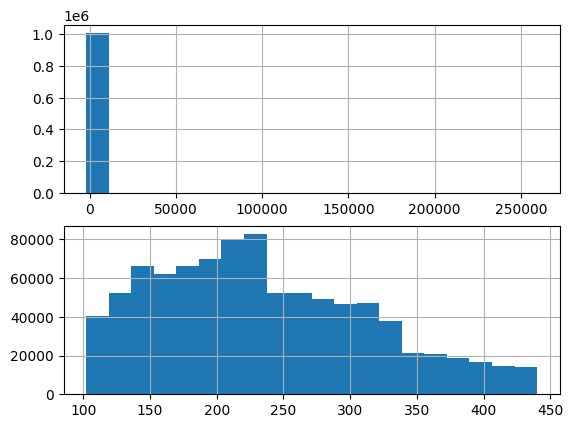

In [9]:
for feature in df.columns:
    dtype = df[feature].dtype
    display(HTML(f"<h3>{feature} : {dtype}</h3>"))
    if dtype == np.float64:
        fig, axes = plt.subplots(2, 1)
        df[feature].hist(bins=20, ax=axes[0])
        df[
            (df[feature] > df[feature].quantile(0.05))
            & (df[feature] < df[feature].quantile(0.95))
        ][feature].hist(bins=20, ax=axes[1])
        plt.show()
    if dtype in [np.int64, object]:
        print(f"Number of distinct values: {df[feature].nunique()}")
    if dtype in [np.int64, object, bool]:
        if df[feature].nunique() / len(df) < 0.8:
            df_value_counts = df[feature].value_counts().to_frame()
            df_value_counts["ratio"] = (
                df_value_counts[feature] / df_value_counts[feature].sum()
            )
            display(
                df_value_counts.head(25).style.format(
                    {
                        "ratio": "{:.2%}".format,
                    }
                )
            )

# 4. Correlations

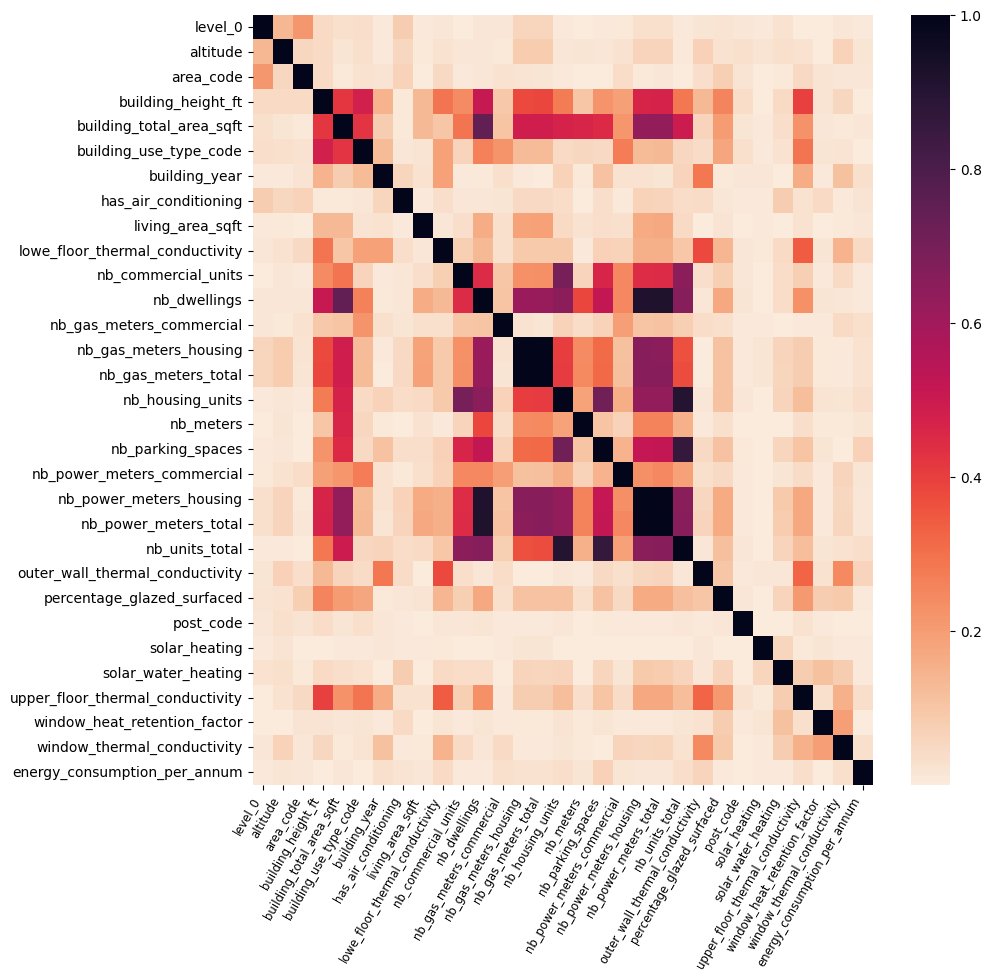

In [10]:
fig = plt.figure(figsize=(10, 10))
corrMatrix = df.corr(numeric_only=True).abs()
sns.heatmap(corrMatrix, cmap="rocket_r", annot=False)
plt.xticks(rotation=60, ha="right", fontsize="small")
plt.show()
plt.style.use("default")
plt.rcParams["axes.axisbelow"] = True

In [11]:
df.corr(numeric_only=True).abs()[Y_PRED].to_frame().sort_values(
    by=Y_PRED, ascending=False
)

,energy_consumption_per_annum
energy_consumption_per_annum,1.000000
nb_parking_spaces,0.068289
outer_wall_thermal_conductivity,0.059926
lowe_floor_thermal_conductivity,0.045895
nb_housing_units,0.034969
nb_units_total,0.034591
upper_floor_thermal_conductivity,0.033031
nb_gas_meters_commercial,0.029457
building_year,0.029370
window_thermal_conductivity,0.027939


# 5. Distribution of Y_PRED according to categorical features

In [12]:
def distributions(df, y_pred, feature):
    df = df[
        (df[y_pred] > df[y_pred].quantile(0.05))
        & (df[y_pred] < df[y_pred].quantile(0.95))
    ]
    df = df.sample(frac=0.5)
    fig, ax = plt.subplots()
    for label, p_df in df.groupby(feature):
        try:
            p_df[y_pred].plot(kind="kde", ax=ax, label=label)
        except ValueError:
            pass
    plt.legend()
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(which="major")
    ax.grid(visible=True, which="minor", axis="y", linestyle="--", alpha=0.3)
    ax.set_xlabel(y_pred)
    ax.set_ylabel("Density")
    # plt.title(
    #     f"Distribution of {y_pred}\naccording to {feature}",
    #     fontweight="bold",
    # )
    plt.show()

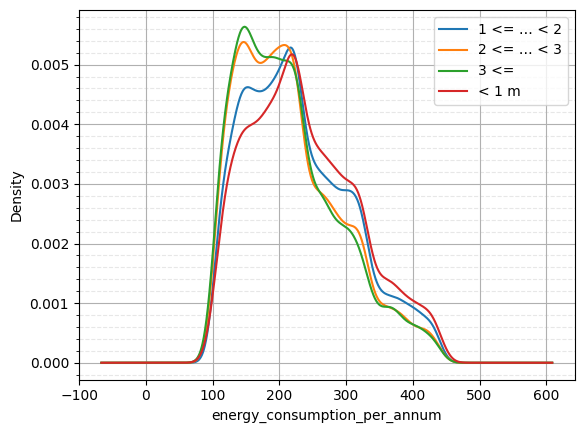

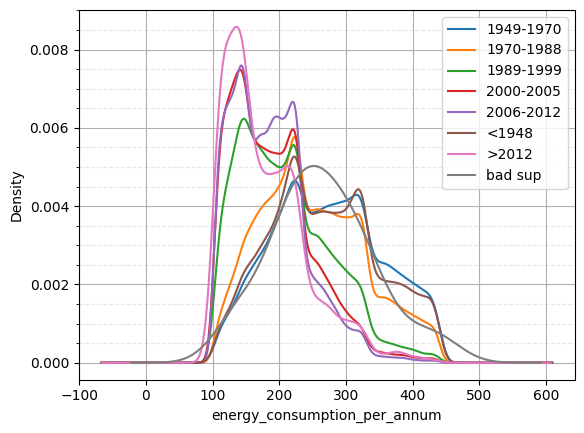

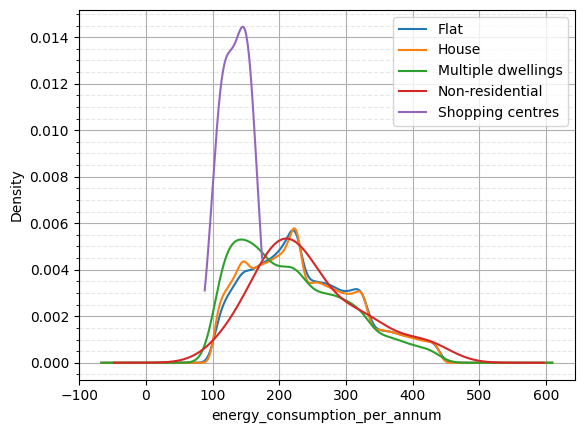

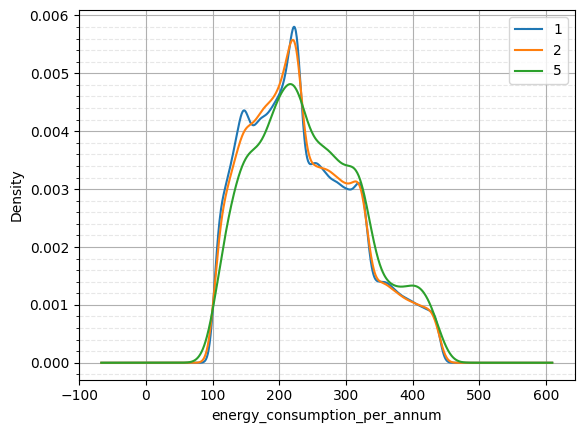

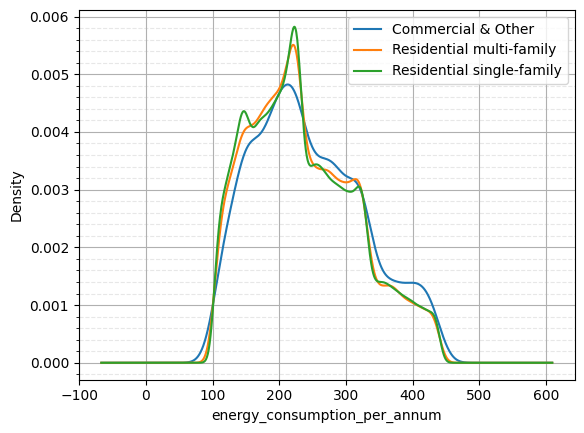

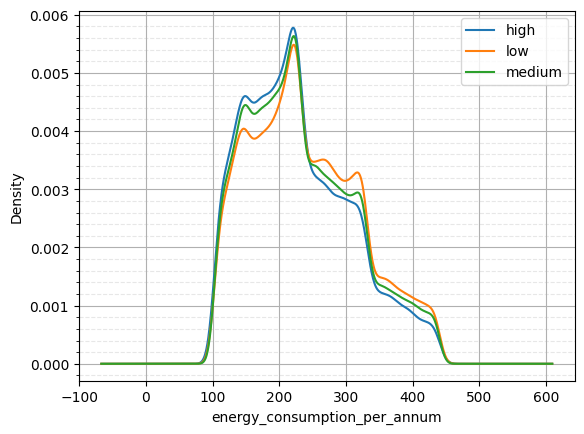

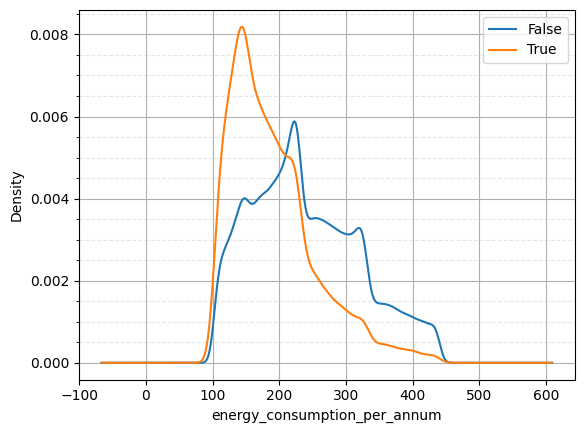

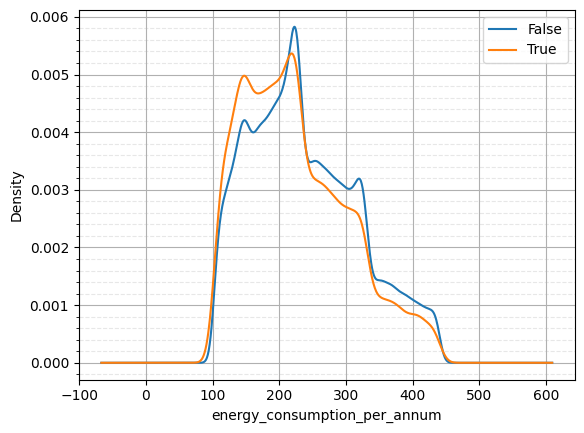

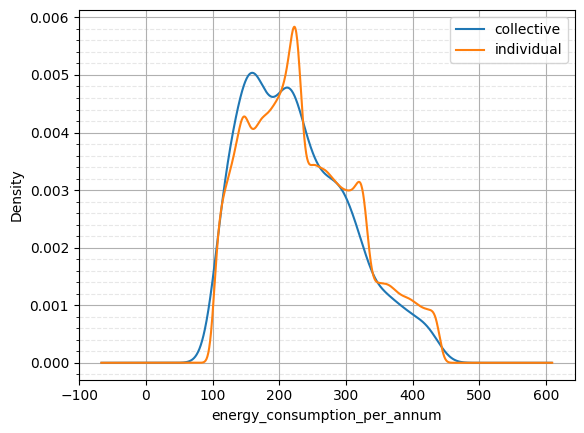

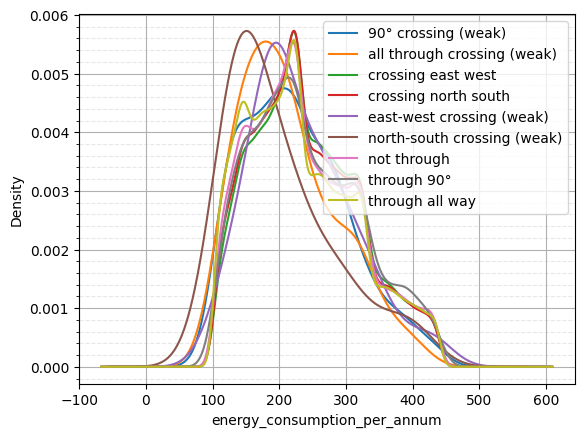

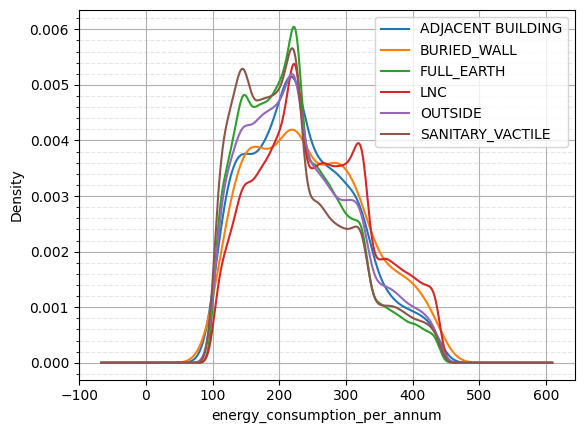

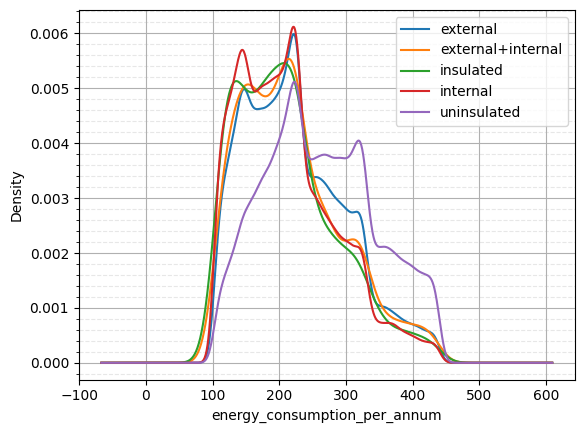

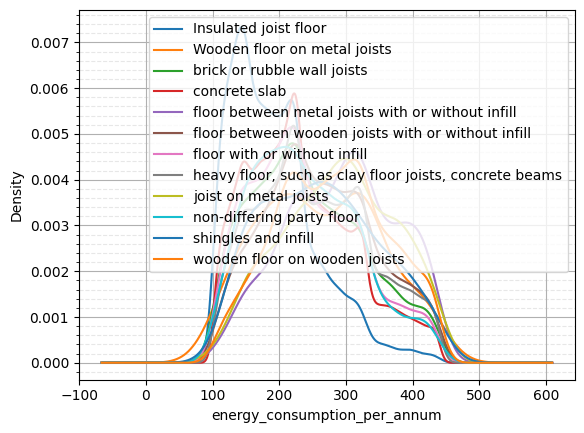

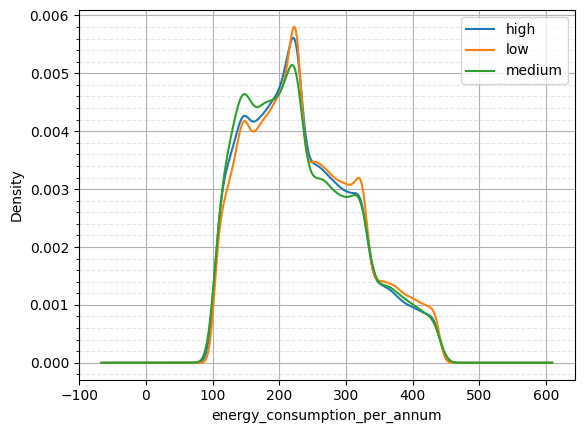

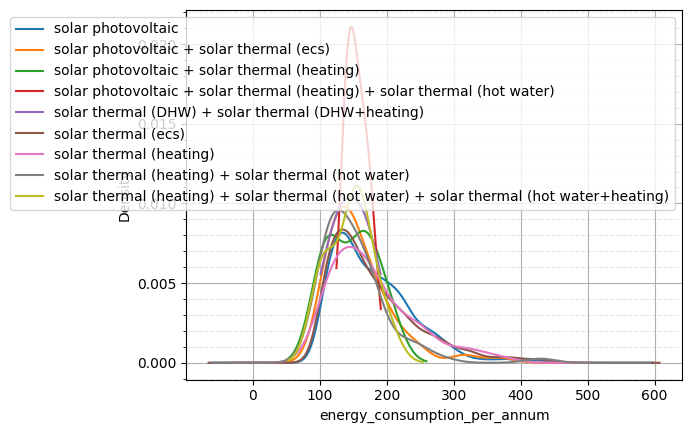

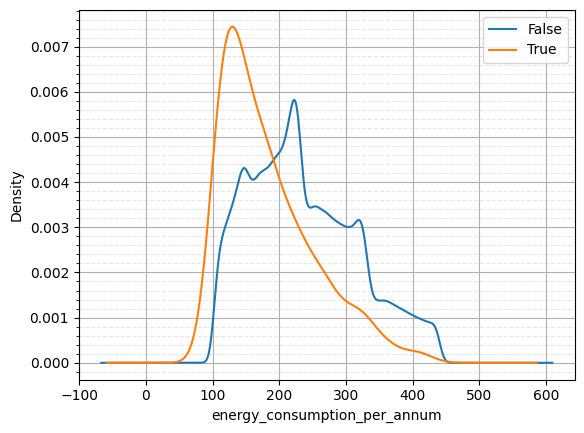

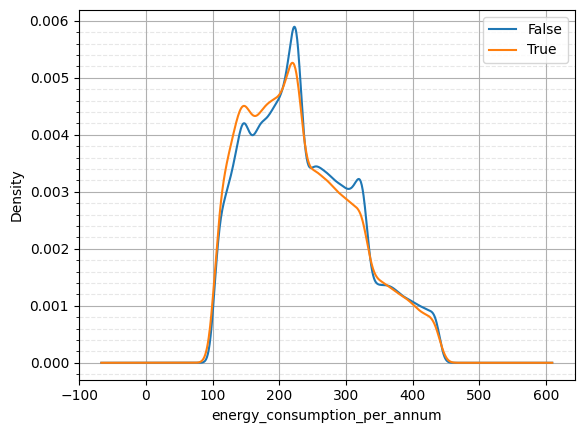

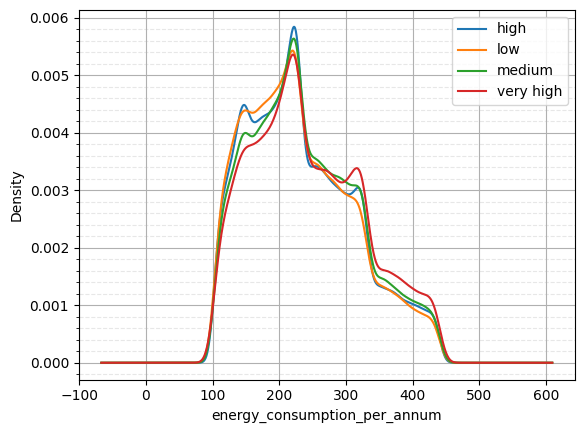

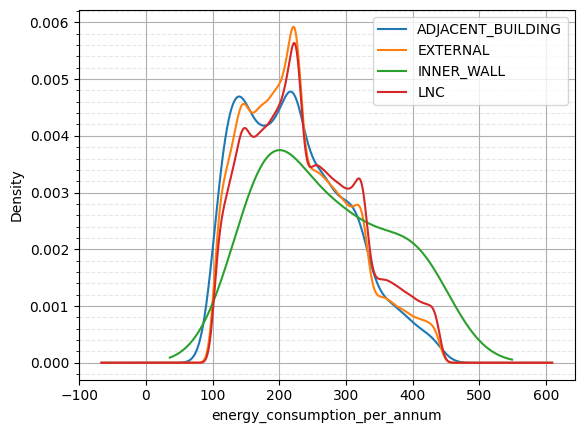

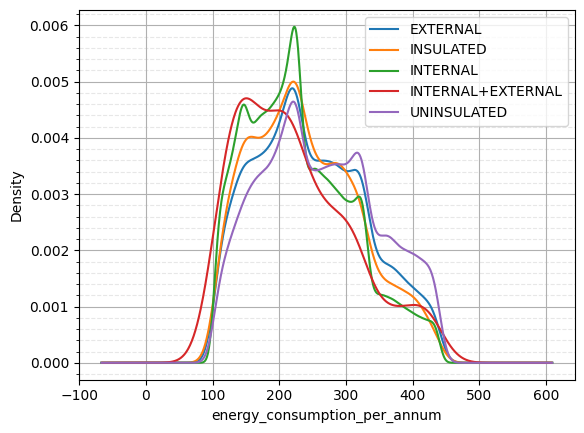

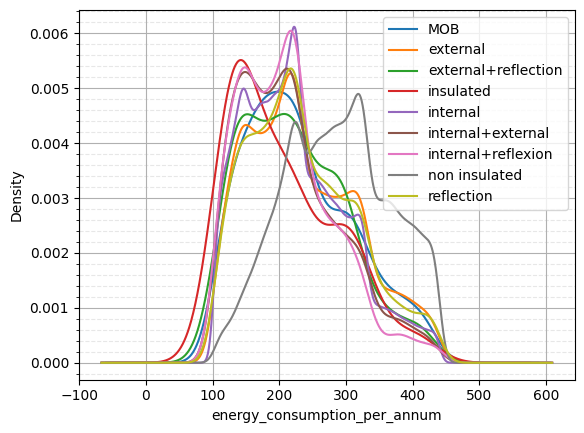

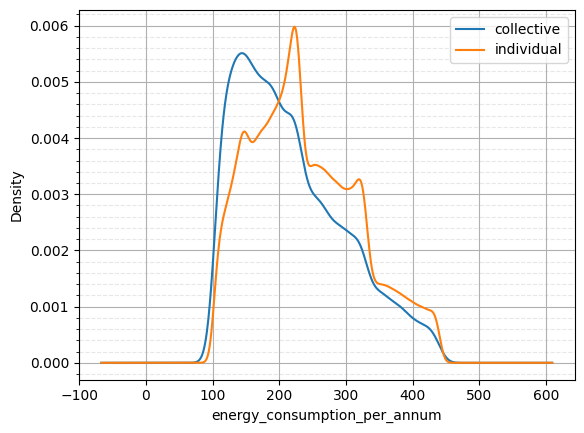

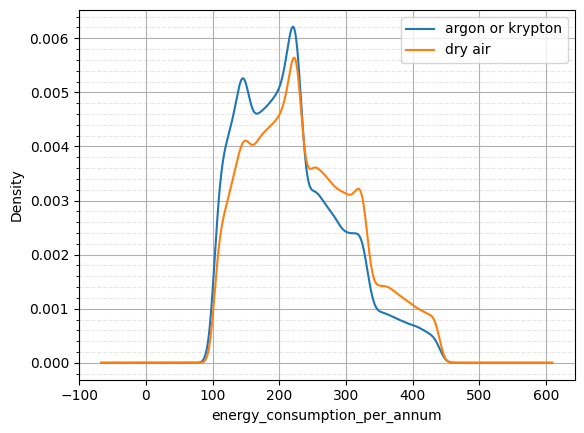

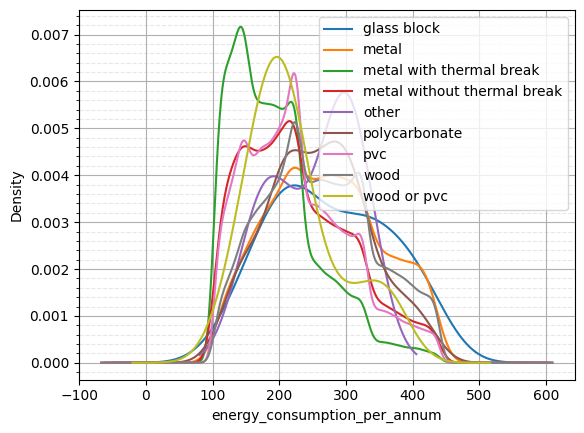

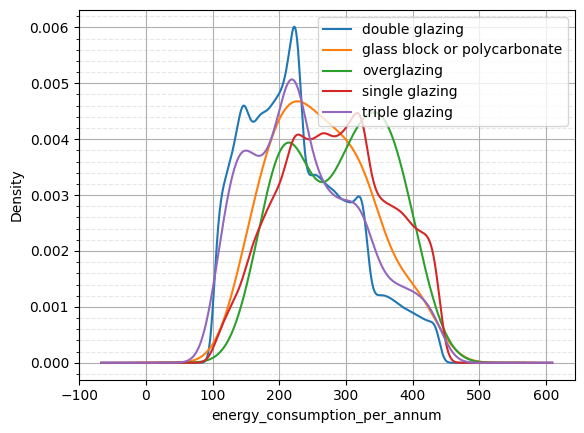

In [13]:
for feature in df.columns:
    dtype = df[feature].dtype
    if dtype in [np.int64, object, bool] and df[feature].nunique() < 15:
        display(HTML(f"<h3>{feature} : {dtype}</h3>"))
        distributions(df, Y_PRED, feature)